<a href="https://colab.research.google.com/github/FisayoAdeyemi/Linkedin_Google_ProfileScraper/blob/main/fisayo_churn_project.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Importing Libraries

In [72]:
#Importing Tensorflow
import tensorflow as tf

#Importing necessary packages for me to do analysis
import pandas as pd
import numpy as np

# For visualization
import matplotlib.pyplot as plt
%matplotlib inline
import seaborn as sns

# Importing TensorFlow model-related building libraries
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense

# Importing Sci-Kit Learn model-related buidling libraries
from sklearn import model_selection
from sklearn.model_selection import train_test_split

# Importing Sci-Kit learn libraries for encoding, and transforming columns
from sklearn.preprocessing import LabelEncoder, OneHotEncoder
from sklearn.compose import ColumnTransformer

# Importting Sci-Kit Learn libraries for metrics and scoring of the models built
from sklearn.metrics import confusion_matrix
from sklearn.metrics import precision_score, recall_score, accuracy_score, auc, roc_auc_score 


# Just some code telling pandas how to display our rows and colums :)
pd.options.display.max_rows = None
pd.options.display.max_columns = None

# Reading Dataset and Feature Elimination


---


- Read the dataset properly 
- Print the overview of the data (statistical summary, shape, info, etc) 
- Eliminate the unique features from the dataset with proper reasoning

In [73]:
#Reading in the data
df1 = pd.read_csv("bank.csv")

#Checking first 20 rows
df1.head(20)

,RowNumber,CustomerId,Surname,CreditScore,Geography,Gender,Age,Tenure,Balance,NumOfProducts,HasCrCard,IsActiveMember,EstimatedSalary,Exited
0,1,15634602,Hargrave,619,France,Female,42,2,0.00,1,1,1,101348.88,1
1,2,15647311,Hill,608,Spain,Female,41,1,83807.86,1,0,1,112542.58,0
2,3,15619304,Onio,502,France,Female,42,8,159660.80,3,1,0,113931.57,1
3,4,15701354,Boni,699,France,Female,39,1,0.00,2,0,0,93826.63,0
4,5,15737888,Mitchell,850,Spain,Female,43,2,125510.82,1,1,1,79084.10,0
5,6,15574012,Chu,645,Spain,Male,44,8,113755.78,2,1,0,149756.71,1
6,7,15592531,Bartlett,822,France,Male,50,7,0.00,2,1,1,10062.80,0
7,8,15656148,Obinna,376,Germany,Female,29,4,115046.74,4,1,0,119346.88,1
8,9,15792365,He,501,France,Male,44,4,142051.07,2,0,1,74940.50,0
9,10,15592389,H?,684,France,Male,27,2,134603.88,1,1,1,71725.73,0


In [74]:
#Describe the dataframe in 5 point summary 

df1.describe().apply(lambda s: s.apply('{0:.3f}'.format)).T #Lambda function is just to change from Scientific notation to decimal

,count,mean,std,min,25%,50%,75%,max
RowNumber,10000.000,5000.500,2886.896,1.000,2500.750,5000.500,7500.250,10000.000
CustomerId,10000.000,15690940.569,71936.186,15565701.000,15628528.250,15690738.000,15753233.750,15815690.000
CreditScore,10000.000,650.529,96.653,350.000,584.000,652.000,718.000,850.000
Age,10000.000,38.922,10.488,18.000,32.000,37.000,44.000,92.000
Tenure,10000.000,5.013,2.892,0.000,3.000,5.000,7.000,10.000
Balance,10000.000,76485.889,62397.405,0.000,0.000,97198.540,127644.240,250898.090
NumOfProducts,10000.000,1.530,0.582,1.000,1.000,1.000,2.000,4.000
HasCrCard,10000.000,0.706,0.456,0.000,0.000,1.000,1.000,1.000
IsActiveMember,10000.000,0.515,0.500,0.000,0.000,1.000,1.000,1.000
EstimatedSalary,10000.000,100090.240,57510.493,11.580,51002.110,100193.915,149388.247,199992.480


In [75]:
df1.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10000 entries, 0 to 9999
Data columns (total 14 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   RowNumber        10000 non-null  int64  
 1   CustomerId       10000 non-null  int64  
 2   Surname          10000 non-null  object 
 3   CreditScore      10000 non-null  int64  
 4   Geography        10000 non-null  object 
 5   Gender           10000 non-null  object 
 6   Age              10000 non-null  int64  
 7   Tenure           10000 non-null  int64  
 8   Balance          10000 non-null  float64
 9   NumOfProducts    10000 non-null  int64  
 10  HasCrCard        10000 non-null  int64  
 11  IsActiveMember   10000 non-null  int64  
 12  EstimatedSalary  10000 non-null  float64
 13  Exited           10000 non-null  int64  
dtypes: float64(2), int64(9), object(3)
memory usage: 1.1+ MB


In [76]:
df1.shape

(10000, 14)

In [77]:
df1.nunique()

RowNumber          10000
CustomerId         10000
Surname             2932
CreditScore          460
Geography              3
Gender                 2
Age                   70
Tenure                11
Balance             6382
NumOfProducts          4
HasCrCard              2
IsActiveMember         2
EstimatedSalary     9999
Exited                 2
dtype: int64

- Columns 'RowNumber' and 'CustomerID' are unique columns with max value of 10,000 value each and hence can be dropped since they don't provide useful information to our analysis 

- Also, from observation, Surname needs to be investigated further


In [78]:
df1.Surname.value_counts().unique()


array([32, 29, 28, 26, 25, 24, 23, 22, 21, 20, 19, 18, 17, 16, 15, 14, 13,
       12, 11, 10,  9,  8,  7,  6,  5,  4,  3,  2,  1])

From the above, Surname is also unique and should be dropped from analysis

In [79]:
# Checking for Null Values

df1.isnull().sum()
# This indicates there are no Null Values

RowNumber          0
CustomerId         0
Surname            0
CreditScore        0
Geography          0
Gender             0
Age                0
Tenure             0
Balance            0
NumOfProducts      0
HasCrCard          0
IsActiveMember     0
EstimatedSalary    0
Exited             0
dtype: int64

In [80]:
#Because Columns 'RowNumber', 'CustomerId' and 'Surname' are unique I drop them from my analysis
df = df1.drop(['RowNumber', 'CustomerId', 'Surname'], axis=1)

In [81]:
# Pandas df we will continue analysis with

df.head()

,CreditScore,Geography,Gender,Age,Tenure,Balance,NumOfProducts,HasCrCard,IsActiveMember,EstimatedSalary,Exited
0,619,France,Female,42,2,0.00,1,1,1,101348.88,1
1,608,Spain,Female,41,1,83807.86,1,0,1,112542.58,0
2,502,France,Female,42,8,159660.80,3,1,0,113931.57,1
3,699,France,Female,39,1,0.00,2,0,0,93826.63,0
4,850,Spain,Female,43,2,125510.82,1,1,1,79084.10,0


# Perform an Exploratory Data Analysis on the data


---


- Bivariate analysis 
- Use appropriate visualizations to identify the patterns and insights 
- Come up with a customer profile (characteristics of a customer) of the different packages 
- Any other exploratory deep dive

Next I want to check the relationship between our target variabie (i.e - Whether or not the Customer left the bank [  churned ] and other featured in the dataset

In [82]:
#Checking distribution between who churned from different geographies (countries)

#Before we check the relationship, I want to check how many people are represented from each country
df['Geography'].value_counts()

France     5014
Germany    2509
Spain      2477
Name: Geography, dtype: int64

From the above Geography is a categorical type with 3 values 

- France
- Germany
- Spain

In [83]:
(df['Geography'].value_counts() / df['Geography'].value_counts().sum()) * 100

France     50.14
Germany    25.09
Spain      24.77
Name: Geography, dtype: float64

50% of people are from France and 25% each from Germany and spain

In [84]:
# Checking % of people who exitted vs those who didnt 

exit_percent = df['Exited'].value_counts(normalize=True)*100
print('Percentage of people that did not exit is: ',round(exit_percent[0],2), '%')

Percentage of people that did not exit is:  79.63 %


In [85]:
print('Percentage of people exitted is: ',round(exit_percent[1], 2), '%')

Percentage of people exitted is:  20.37 %


In [86]:
df.columns

Index(['CreditScore', 'Geography', 'Gender', 'Age', 'Tenure', 'Balance',
       'NumOfProducts', 'HasCrCard', 'IsActiveMember', 'EstimatedSalary',
       'Exited'],
      dtype='object')

/usr/local/lib/python3.7/dist-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning


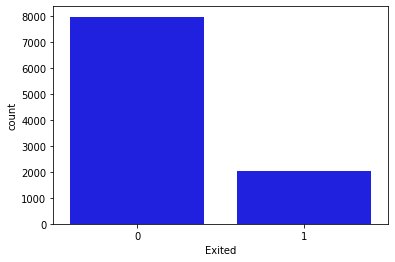

In [87]:
# Making a countplot to explore target variable

sns.countplot(df['Exited'], color = 'blue')

In [88]:
# Using Geography disctribution to analyse the target Variable

df[df["Exited"] == 1]['Geography'].value_counts() / df['Geography'].value_counts() *100 

France     16.154767
Germany    32.443204
Spain      16.673395
Name: Geography, dtype: float64

From the above:

- 32% of people who exitted are German
- 16% of people who exitted are French
- 16% of people who exitted are Spanish


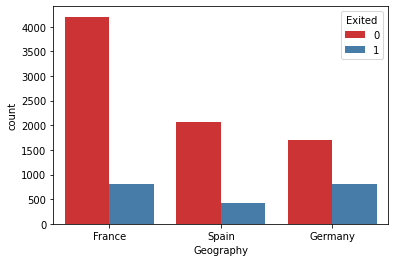

In [89]:
sns.countplot(x='Geography', hue='Exited', data=df, palette = 'Set1')

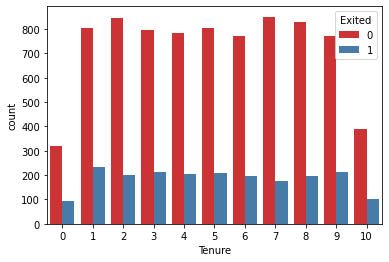

In [90]:
sns.countplot(x='Tenure', hue='Exited', data=df, palette = 'Set1')

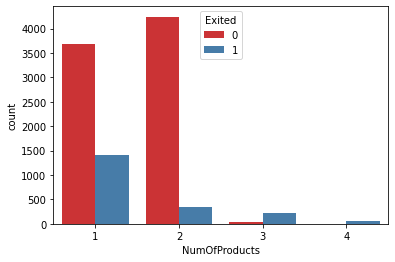

In [99]:
sns.countplot(x='NumOfProducts', hue='Exited', data=df, palette = 'Set1')
# Checking who exited with relation to no of products they have with the bank

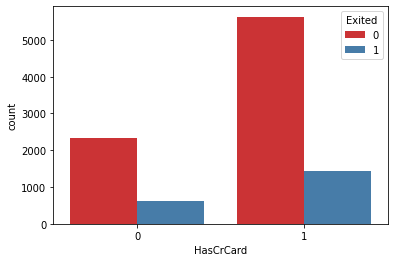

In [100]:
sns.countplot(x='HasCrCard', hue='Exited', data=df, palette = 'Set1')

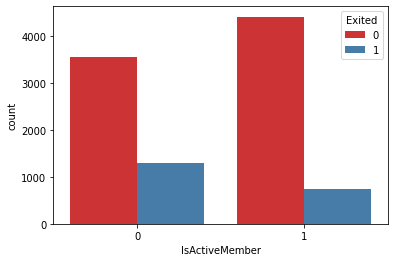

In [101]:
sns.countplot(x='IsActiveMember', hue='Exited', data=df, palette = 'Set1')

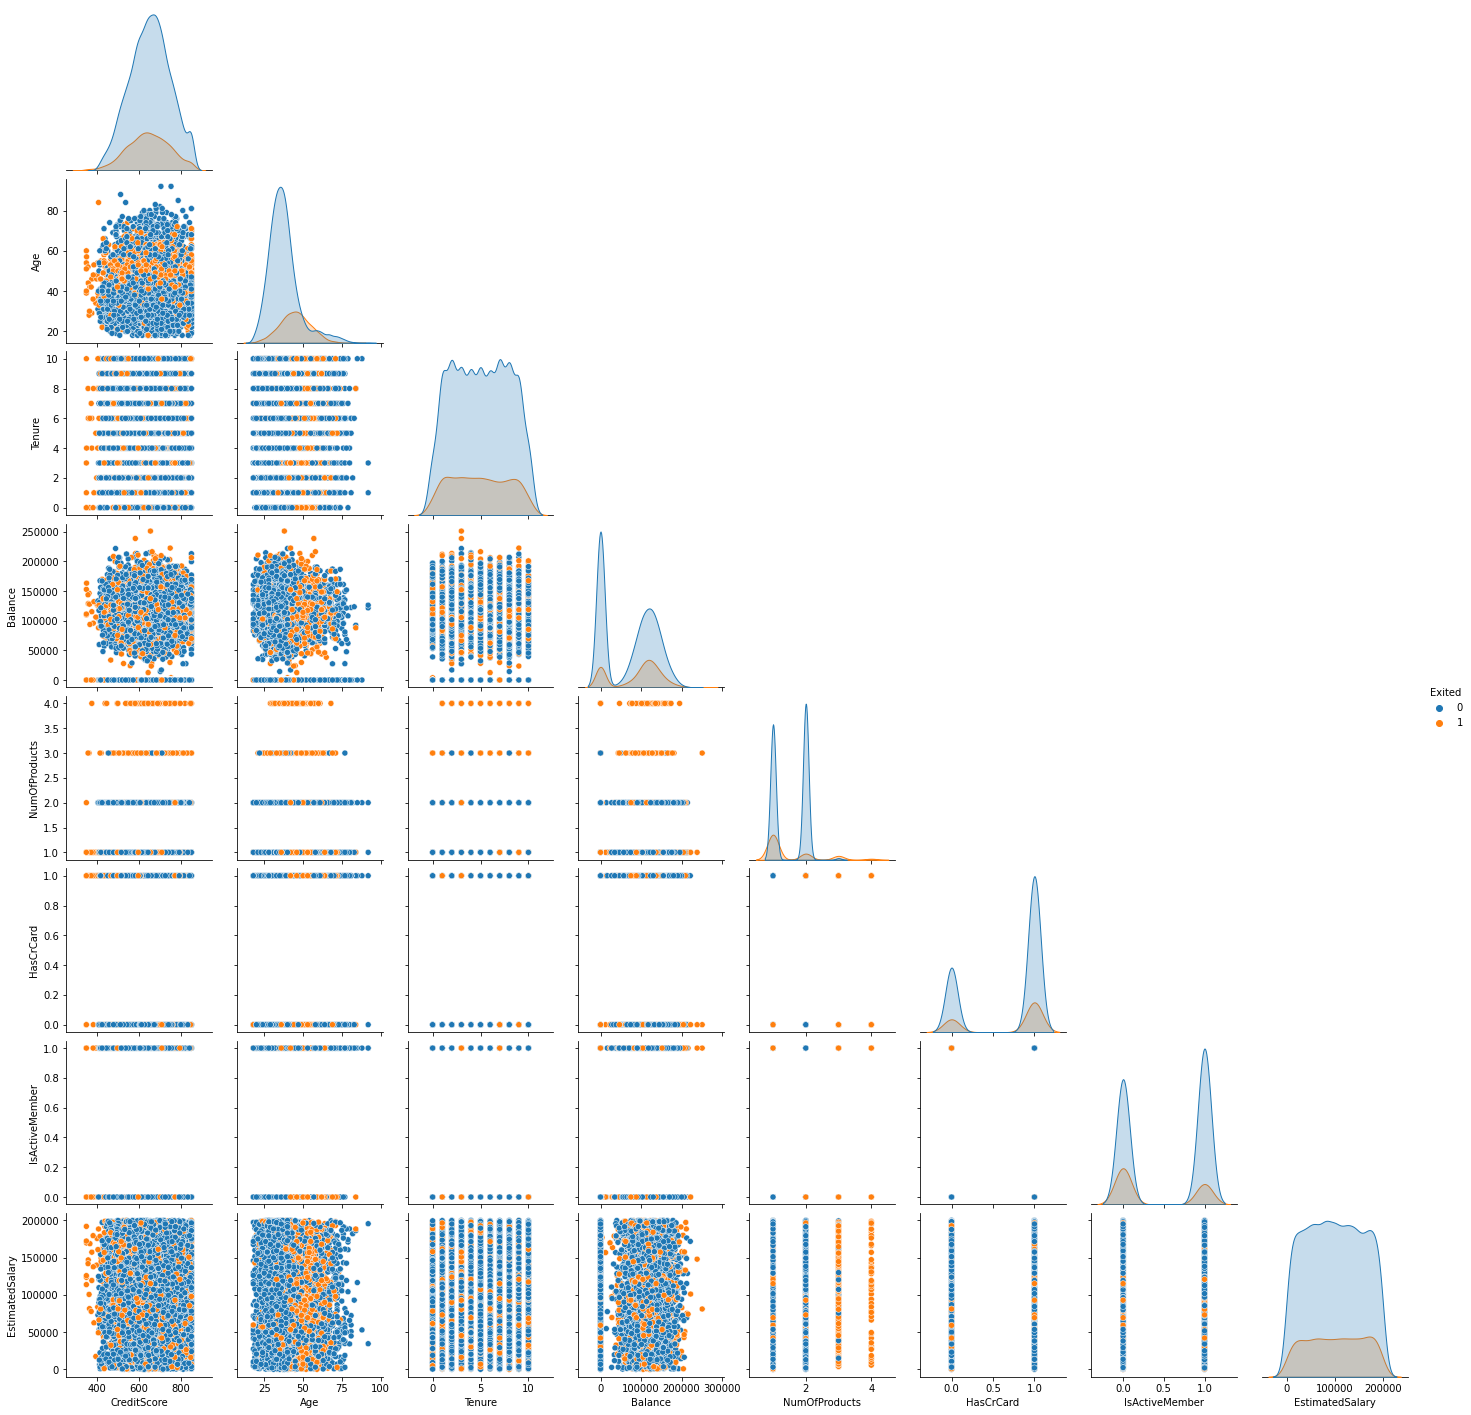

In [107]:
sns.pairplot(df, hue='Exited', corner=True)

In [91]:
df[df["Exited"] == 1]['Gender'].value_counts() / df['Gender'].value_counts() *100

Female    25.071539
Male      16.455928
Name: Gender, dtype: float64

In [92]:
df.groupby(['NumOfProducts']).mean()

,CreditScore,Age,Tenure,Balance,HasCrCard,IsActiveMember,EstimatedSalary,Exited
NumOfProducts,,,,,,,,
1,649.120968,39.673092,4.974626,98551.870614,0.703777,0.504131,99487.256851,0.277144
2,652.188671,37.753595,5.051852,51879.145813,0.707190,0.532898,100452.012821,0.075817
3,648.105263,43.195489,5.003759,75458.328195,0.714286,0.424812,104318.130564,0.827068
4,653.583333,45.683333,5.300000,93733.135000,0.683333,0.483333,104763.723333,1.000000


From the Above, Column 'Age' looks like it needs more analysis

In [97]:
df.groupby(['Exited']).mean()

,CreditScore,Age,Tenure,Balance,NumOfProducts,HasCrCard,IsActiveMember,EstimatedSalary
Exited,,,,,,,,
0,651.853196,37.408389,5.033279,72745.296779,1.544267,0.707146,0.554565,99738.391772
1,645.351497,44.837997,4.932744,91108.539337,1.475209,0.699067,0.360825,101465.677531


# Illustrate the insights based on EDA

---


- Key meaningful observations from Bivariate analysis

## 1. From the Geography analysis 

- 32% of people exitted and are German
- 16% of people exitted and are French
- 16% of people exitted and are Spanish

## 2. From the Gender Analysis
- 25% of people exitted and are Female
- 16% of people exitted and are Male

## 3. From Age Analysys
- People who exited are older (about 45 years) compared to those that dont exit 37, So it seems, younger people are more likely to not churn

## 4. Tenure is same for those who exit vs not exit, which is 5. Not a very good predictor

## 5. The Rest of the colums seem to be better predictor

## 6. People with credit cards seem to exit more


# Data Pre-processing
- Split the target variable and predictors 
- Split the data into train and test - Rescale the data


In [109]:
X = df.iloc[:,0:10].values # Credit Score through Estimated Salary
y = df.iloc[:,10].values # Exited

In [110]:
y

array([1, 0, 1, ..., 1, 1, 0])

In [113]:
label_X_country_encoder = LabelEncoder()
label_X_country_encoder.fit_transform(X[:, 1])

# Encoding categorical Country data
print(X[:8,1], ' will be represented as')

label_X_country_encoder = LabelEncoder()
X[:,1] = label_X_country_encoder.fit_transform(X[:,1])
print(X[:8,1])

# Encoding Gender also and transforming it using fit.transform

label_X_gender_encoder = LabelEncoder()
X[:,2] = label_X_gender_encoder.fit_transform(X[:,2])
print(X[:6,2])

[0 2 0 0 2 2 0 1]  will be represented as
[0 2 0 0 2 2 0 1]
[0 0 0 0 0 1]


In [115]:
# Performing Onehot Encoding because of Categorical data type

countryhotencoder = ColumnTransformer([("countries", OneHotEncoder(), [1])], remainder="passthrough")
X = countryhotencoder.fit_transform(X)

# Model building

---

- Build Neural Network

In [116]:
X.shape

(10000, 12)

In [117]:
# Using one hot encoding we can take n-1 of the number of encoded columns and still have complete representation of the dataframe

X = X[:,1:] # Deleted Spain as a dimension.

In [119]:
# Splitting the dataset into the Training and Testing set.

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.3, random_state = 0)

In [120]:
X_train.shape

(7000, 11)

In [121]:
#Next step is to Normalize the data using scaling

# Feature Scaling
from sklearn.preprocessing import StandardScaler

scaled=StandardScaler()
X_train = scaled.fit_transform(X_train)
X_test = scaled.transform(X_test)

## Initialize Model and Build

In [128]:
# Initializing the ANN
Model = Sequential()

#Adding the input layer and using modern relu as activation
Model.add(Dense(activation = 'relu', input_dim = 11, units=6, kernel_initializer='uniform'))

In [129]:
#Add 1st hidden layer
Model.add(Dense(6, activation='sigmoid', kernel_initializer='uniform'))

# Add Output layer and apply sigmoid to obtain probality as output
Model.add(Dense(1, activation = 'sigmoid', kernel_initializer='uniform')) 

In [130]:
# Compile the model and use default learning rate on first iteration 
Model.compile(optimizer='SGD', loss='mse', metrics=['accuracy'])

#Note Metric used is Accuracy

In [131]:
# Lets get a summary of our model that we just build
Model.summary()

Model: "sequential_2"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
dense_4 (Dense)              (None, 6)                 72        
_________________________________________________________________
dense_5 (Dense)              (None, 6)                 42        
_________________________________________________________________
dense_6 (Dense)              (None, 1)                 7         
Total params: 121
Trainable params: 121
Non-trainable params: 0
_________________________________________________________________


In [132]:
#Fiting the data on out model using 100 epochs and a batch size of 32 for starter

Model.fit(X_train, y_train, validation_data=(X_test,y_test), epochs=100, batch_size=32)

Epoch 1/100
219/219 [==============================] - 1s 2ms/step - loss: 0.2147 - accuracy: 0.7583 - val_loss: 0.1890 - val_accuracy: 0.7930
Epoch 2/100
219/219 [==============================] - 0s 2ms/step - loss: 0.1774 - accuracy: 0.7977 - val_loss: 0.1724 - val_accuracy: 0.7930
Epoch 3/100
219/219 [==============================] - 0s 1ms/step - loss: 0.1674 - accuracy: 0.7977 - val_loss: 0.1673 - val_accuracy: 0.7930
Epoch 4/100
219/219 [==============================] - 0s 1ms/step - loss: 0.1639 - accuracy: 0.7977 - val_loss: 0.1655 - val_accuracy: 0.7930
Epoch 5/100
219/219 [==============================] - 0s 1ms/step - loss: 0.1626 - accuracy: 0.7977 - val_loss: 0.1647 - val_accuracy: 0.7930
Epoch 6/100
219/219 [==============================] - 0s 2ms/step - loss: 0.1620 - accuracy: 0.7977 - val_loss: 0.1644 - val_accuracy: 0.7930
Epoch 7/100
219/219 [==============================] - 0s 1ms/step - loss: 0.1617 - accuracy: 0.7977 - val_loss: 0.1642 - val_accuracy: 0.7930

In [ ]:
# Noticed Loss stopped reducing signicantly after 10th Epoch, But will evaluate later

In [141]:
y_pred = Model.predict(X_test)

#Printing the Area Under the Curve 
print("AUC = {}".format((roc_auc_score(y_test, y_pred))))


AUC = 0.7412206511755097


In [149]:
food = [1,2,3]

for each in food:
  print food(each)

SyntaxError: ignored

In [152]:
# Because we used Sigmoid we will use a threshold to convert Probabilities to binary True or False

treshold = [0.5, 0.6, 0.7, 0.8, 0.9]

for each in treshold:
  y_pred = ( y_pred > each )

  print("Precision = {}".format(precision_score(y_test, y_pred)))
  print("Recall = {}".format(recall_score(y_test, y_pred)))
  print("Accuracy = {}".format(accuracy_score(y_test, y_pred)))
  print('')
  print('------------------------------')
  print('')

Precision = 0.0
Recall = 0.0
Accuracy = 0.793

------------------------------

Precision = 0.0
Recall = 0.0
Accuracy = 0.793

------------------------------

Precision = 0.0
Recall = 0.0
Accuracy = 0.793

------------------------------

Precision = 0.0
Recall = 0.0
Accuracy = 0.793

------------------------------

Precision = 0.0
Recall = 0.0
Accuracy = 0.793

------------------------------



/usr/local/lib/python3.7/dist-packages/sklearn/metrics/_classification.py:1272: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 due to no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


In [158]:
# Priting Accuracy and confusion Matrix

cm1 = confusion_matrix(y_test, y_pred)
print(cm1)

[[2379    0]
 [ 621    0]]


In [159]:
accuracy_model1 = ((cm1[0][0]+cm1[1][1])*100)/(cm1[0][0]+cm1[1][1]+cm1[0][1]+cm1[1][0])
print (accuracy_model1, '% of testing data was classified correctly')

79.3 % of testing data was classified correctly


# Model Performance Improvement
- Comment on which metric is right for model performance evaluation and why? 
- Find the optimal threshold using ROC-AUC or Precision-Recall curves 
- Comment on model performance 
- Can model performance be improved? check and comment 
- Build another model to implement these improvements 
- Include all the model which were trained to reach at the final one

In [162]:
Model2 = Sequential()
Model2.add(Dense(activation = 'relu', input_dim = 11, units=6, kernel_initializer='uniform'))
Model2.add(Dense(activation = 'relu', units=6, kernel_initializer='uniform'))
Model2.add(Dense(activation = 'sigmoid', units=1, kernel_initializer='uniform')) # Output Layer

# Changing the Optimizer function to Adam 
Model2.compile(optimizer='adam', loss = 'binary_crossentropy', metrics=['accuracy']) 

In [163]:
Model2.summary()

Model: "sequential_5"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
dense_10 (Dense)             (None, 6)                 72        
_________________________________________________________________
dense_11 (Dense)             (None, 6)                 42        
_________________________________________________________________
dense_12 (Dense)             (None, 1)                 7         
Total params: 121
Trainable params: 121
Non-trainable params: 0
_________________________________________________________________


# Model Performance Evaluation

---

- Evaluate the model on different performance metrics and comment on the performance and scope of improvement




In [164]:
#Using Less Epochs and Batch size

Model2.fit(X_train, y_train,           
          validation_data=(X_test,y_test),
          epochs=50,
          batch_size=16)

Epoch 1/50
438/438 [==============================] - 1s 2ms/step - loss: 0.5240 - accuracy: 0.7973 - val_loss: 0.4431 - val_accuracy: 0.7930
Epoch 2/50
438/438 [==============================] - 1s 2ms/step - loss: 0.4316 - accuracy: 0.7977 - val_loss: 0.4321 - val_accuracy: 0.7930
Epoch 3/50
438/438 [==============================] - 1s 2ms/step - loss: 0.4256 - accuracy: 0.7977 - val_loss: 0.4250 - val_accuracy: 0.7930
Epoch 4/50
438/438 [==============================] - 1s 1ms/step - loss: 0.4205 - accuracy: 0.8091 - val_loss: 0.4198 - val_accuracy: 0.8203
Epoch 5/50
438/438 [==============================] - 1s 1ms/step - loss: 0.4163 - accuracy: 0.8240 - val_loss: 0.4144 - val_accuracy: 0.8377
Epoch 6/50
438/438 [==============================] - 1s 1ms/step - loss: 0.4122 - accuracy: 0.8294 - val_loss: 0.4113 - val_accuracy: 0.8363
Epoch 7/50
438/438 [==============================] - 1s 1ms/step - loss: 0.4094 - accuracy: 0.8327 - val_loss: 0.4070 - val_accuracy: 0.8387
Epoch 

In [165]:
#Using Less Epochs and Batch size

Model2.fit(X_train, y_train,           
          validation_data=(X_test,y_test),
          epochs=20,
          batch_size=16)

Epoch 1/20
438/438 [==============================] - 1s 2ms/step - loss: 0.3935 - accuracy: 0.8370 - val_loss: 0.3963 - val_accuracy: 0.8420
Epoch 2/20
438/438 [==============================] - 1s 1ms/step - loss: 0.3931 - accuracy: 0.8363 - val_loss: 0.3963 - val_accuracy: 0.8430
Epoch 3/20
438/438 [==============================] - 1s 1ms/step - loss: 0.3932 - accuracy: 0.8380 - val_loss: 0.3961 - val_accuracy: 0.8437
Epoch 4/20
438/438 [==============================] - 1s 1ms/step - loss: 0.3932 - accuracy: 0.8384 - val_loss: 0.3971 - val_accuracy: 0.8423
Epoch 5/20
438/438 [==============================] - 1s 2ms/step - loss: 0.3931 - accuracy: 0.8387 - val_loss: 0.3975 - val_accuracy: 0.8423
Epoch 6/20
438/438 [==============================] - 1s 1ms/step - loss: 0.3934 - accuracy: 0.8381 - val_loss: 0.3971 - val_accuracy: 0.8420
Epoch 7/20
438/438 [==============================] - 1s 1ms/step - loss: 0.3932 - accuracy: 0.8390 - val_loss: 0.3968 - val_accuracy: 0.8417
Epoch 

In [166]:
y_pred = Model2.predict(X_test)
print("AUC = {}".format(roc_auc_score(y_test, y_pred)))

AUC = 0.7985939774963297


In [168]:
y_pred = (y_pred > 0.5)

print("Precision = {}".format(precision_score(y_test, y_pred)))
print("Recall = {}".format(recall_score(y_test, y_pred)))
print("Accuracy = {}".format(accuracy_score(y_test, y_pred)))

Precision = 0.7363344051446945
Recall = 0.3687600644122383
Accuracy = 0.842


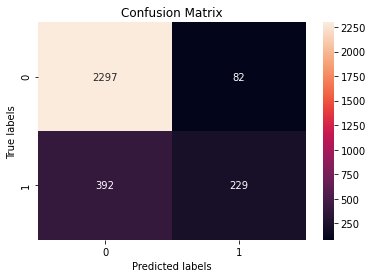

In [171]:
cm2 = confusion_matrix(y_test, y_pred)

ax= plt.subplot()
sns.heatmap(cm2, annot=True, fmt='g', ax=ax);  #annot=True to annotate cells, ftm='g' to disable scientific notation

# labels, title and ticks
ax.set_xlabel('Predicted labels');ax.set_ylabel('True labels'); 
ax.set_title('Confusion Matrix'); 

In [172]:
accuracy_model2 = ((cm2[0][0]+cm2[1][1])*100)/(cm2[0][0]+cm2[1][1]+cm2[0][1]+cm2[1][0])
print (accuracy_model2, '% of testing data was classified correctly')

84.2 % of testing data was classified correctly


# Conclusion and key takeaways

---

- Final conclusion about the analysis

From the Analysis

- Age, Balance and some other parameters seem to be good predictors to accuratey predict churn

- The Customers subscribed to higher number of products were more likely to churn

- To reduce Churn I recommed bank to focus on younger customer as younger ages are less likely to churn and market to all young customers despite credit card rating because there seems to be no strong relationship between churn and credit rating 

- The Model can be further imporoved by tuning more hyperparameters like 

  - Number of Layers
  - Learning Rate
  - Type of Optimazation or Back Propagation 
  - Number of Neurons in a layer

  84.2% is a good score but can be imporoved.

  Thanks
